사용 데이터
- asset_merge.csv
- concern_data_fin.csv
- credit_card_data_fin.csv
- esi_data_fin.csv
- gov_sub.csv
- house_data_fin.csv
- life_data_fin.csv
- move_data.csv
- nsi_data_fin.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
import numpy as np

# 코로나로 인해 일상이 이전과 얼마나 변했는지

In [ ]:
life_data = pd.read_csv("life_data_fin.csv")
life_data.head()

,year,sleep_time,employment,study,child_care,home_care,digital_use,movie/perf/exhi,travel,religion,meeting,smoking,drinking,sports
0,2020,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0
1,2020,5.0,5.0,5.0,5.0,5.0,6.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0
2,2020,5.0,5.0,5.0,5.0,5.0,6.0,5.0,4.0,2.0,3.0,5.0,5.0,5.0
3,2020,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,6.0,6.0,0.0
4,2020,5.0,5.0,5.0,5.0,5.0,9.0,6.0,5.0,0.0,0.0,5.0,5.0,0.0


In [ ]:
life_data_group = life_data.groupby("year").mean().reset_index()
life_data_group

,year,sleep_time,employment,study,child_care,home_care,digital_use,movie/perf/exhi,travel,religion,meeting,smoking,drinking,sports
0,2020,5.004667,4.650818,4.747961,5.239826,5.249466,5.566456,3.924144,3.545169,3.980938,3.10434,4.945256,4.763533,4.264776


In [ ]:
life_data_group = life_data_group.T
life_data_group

,0
year,2020.000000
sleep_time,5.004667
employment,4.650818
study,4.747961
child_care,5.239826
home_care,5.249466
digital_use,5.566456
movie/perf/exhi,3.924144
travel,3.545169
religion,3.980938


In [ ]:
life_data_group = life_data_group.reset_index()
life_data_group = life_data_group.drop(0, axis=0)
life_data_group.columns = ["일상 목록", "변함 정도"]
life_data_group = life_data_group.sort_values("변함 정도").reset_index(drop=True)
life_data_group

,일상 목록,변함 정도
0,meeting,3.104340
1,travel,3.545169
2,movie/perf/exhi,3.924144
3,religion,3.980938
4,sports,4.264776
5,employment,4.650818
6,study,4.747961
7,drinking,4.763533
8,smoking,4.945256
9,sleep_time,5.004667


In [ ]:
life_data_group["변함 정도"] = life_data_group["변함 정도"] -5
life_data_group

,일상 목록,변함 정도
0,meeting,-1.895660
1,travel,-1.454831
2,movie/perf/exhi,-1.075856
3,religion,-1.019062
4,sports,-0.735224
5,employment,-0.349182
6,study,-0.252039
7,drinking,-0.236467
8,smoking,-0.054744
9,sleep_time,0.004667


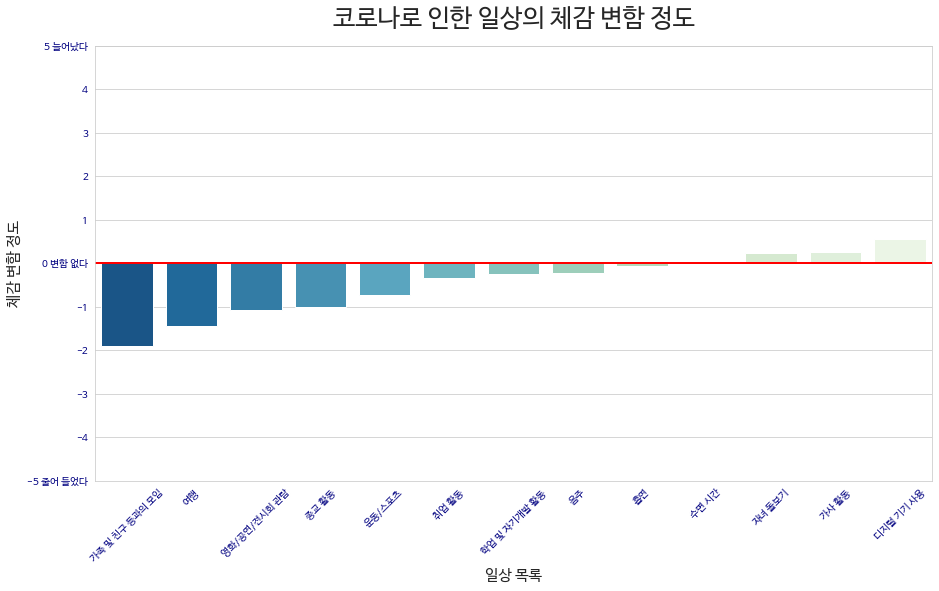

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.yticks(np.arange(-5, 6))
plt.xticks(np.arange(0, 13), rotation=45)

sns.barplot(x='일상 목록', y='변함 정도', data=life_data_group, palette='GnBu_r')

plt.axhline(0, 0, 13, color='red', linestyle='solid', linewidth=2)

plt.xticks(np.arange(0, 13), labels=["가족 및 친구 등과의 모임", "여행", "영화/공연/전시회 관람", "종교 활동", "운동/스포츠", "취업 활동", "학업 및 자기개발 활동", "음주", "흡연", "수면 시간", "자녀 돌보기", "가사 활동", "디지털 기기 사용"], color="navy")
plt.yticks(np.arange(-5, 6), labels=["-5 줄어 들었다", "-4", "-3", "-2", "-1", "0 변함 없다", "1", "2", "3", "4", "5 늘어났다"], color="navy")

plt.xlabel("일상 목록", fontsize=15)
plt.ylabel("체감 변함 정도", fontsize=15)

plt.title("코로나로 인한 일상의 체감 변함 정도", fontsize=25, pad=20)

plt.show()

# 1. 사람들이 어떤 부분을 얼마나 걱정하는지

In [ ]:
concern_data = pd.read_csv("concern_data_fin.csv")
concern_data.head()

,year,national_economy,financial_situation,medical_service,social_security,social_solida,product_supply,unemployment
0,2020,4,1,4,4,4,4,1
1,2020,3,1,3,3,3,3,1
2,2020,3,2,2,3,2,2,1
3,2020,2,1,2,2,2,1,1
4,2020,2,1,2,2,2,1,1


In [ ]:
concern_data_group = concern_data.groupby("year").mean().reset_index()
concern_data_group = concern_data_group.T
concern_data_group

,0
year,2020.000000
national_economy,3.185638
financial_situation,2.732102
medical_service,2.867532
social_security,2.856297
social_solida,2.845628
product_supply,2.662123
unemployment,2.333783


In [ ]:
concern_data_group = concern_data_group.reset_index()
concern_data_group = concern_data_group.drop(0, axis=0)
concern_data_group.columns = ["코로나로 인해 영향을 받을 수 있는 항목", "걱정 정도"]
concern_data_group = concern_data_group.sort_values("걱정 정도", ascending=False).reset_index(drop=True)
concern_data_group

,코로나로 인해 영향을 받을 수 있는 항목,걱정 정도
0,national_economy,3.185638
1,medical_service,2.867532
2,social_security,2.856297
3,social_solida,2.845628
4,financial_situation,2.732102
5,product_supply,2.662123
6,unemployment,2.333783


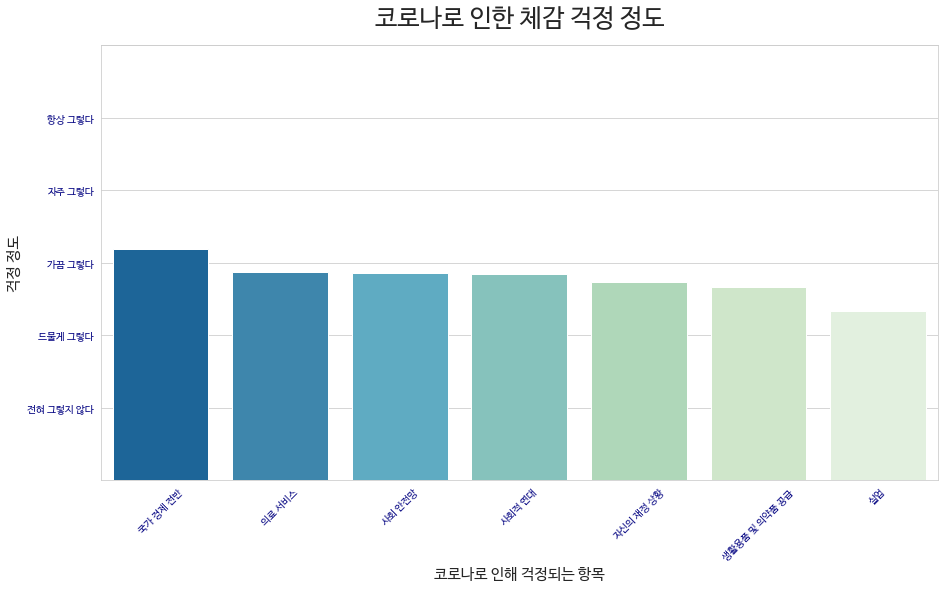

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.yticks(np.arange(0, 7))
plt.xticks(np.arange(0, 7), rotation=45)

sns.barplot(x='코로나로 인해 영향을 받을 수 있는 항목', y='걱정 정도', data=concern_data_group, palette='GnBu_r')

plt.xticks(np.arange(0, 7), labels=["국가 경제 전반", "의료 서비스", "사회 안전망", "사회적 연대", "자신의 재정 상황", "생활용품 및 의약품 공급", "실업"], color="navy")
plt.yticks(np.arange(0, 7), labels=["", "전혀 그렇지 않다", "드물게 그렇다", "가끔 그렇다", "자주 그렇다", "항상 그렇다"], color="navy")

plt.xlabel("코로나로 인해 걱정되는 항목", fontsize=15)
plt.ylabel("걱정 정도", fontsize=15)

plt.title("코로나로 인한 체감 걱정 정도", fontsize=25, pad=20)

plt.show()

## 1-1 국가 경제에는 전반적으로 문제가 있었을까?

In [ ]:
esi_data = pd.read_csv("esi_data_fin.csv")
esi_data.head()

,year_month,esi_cyclicalvalue
0,2019-01,95.2
1,2019-02,95.1
2,2019-03,95.0
3,2019-04,94.9
4,2019-05,94.8


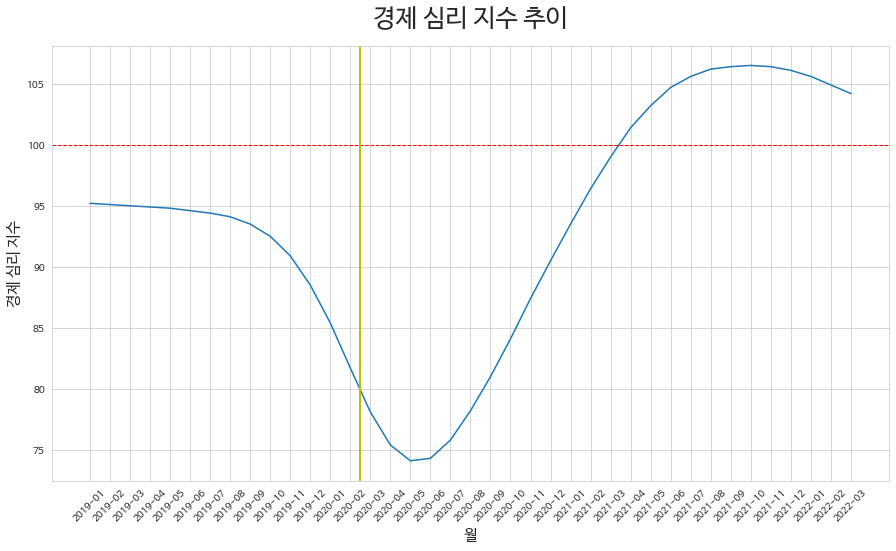

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(np.arange(0, 39), rotation=45)

sns.lineplot(x="year_month", y="esi_cyclicalvalue", data=esi_data, palette='seismic')

plt.axhline(y=100, color='r', linestyle='--', linewidth=1)
plt.axvline(x=13.5, color='y', linewidth=2)


plt.xlabel("월", fontsize=15)
plt.ylabel("경제 심리 지수", fontsize=15)

plt.title("경제 심리 지수 추이", fontsize=25, pad=20)

plt.show()

## 1-2 개인의 재정 상황에는 문제가 없을까?
- 부채가 증가하면 재정 상황이 힘들 것이다라는 가정

In [ ]:
asset_merge = pd.read_csv("asset_merge.csv")
asset_merge.head()

,시점,전가구 평균 자산(만원),전가구 평균 부채(만원)
0,2012,32324,5450
1,2013,32688,5858
2,2014,33539,6051
3,2015,34685,6256
4,2016,36637,6719


In [ ]:
asset_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   시점             10 non-null     int64
 1   전가구 평균 자산(만원)  10 non-null     int64
 2   전가구 평균 부채(만원)  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [ ]:
asset_merge_melted = pd.melt(
    asset_merge,
    id_vars=["시점"],
    value_vars=["전가구 평균 자산(만원)", "전가구 평균 부채(만원)"]
    
)

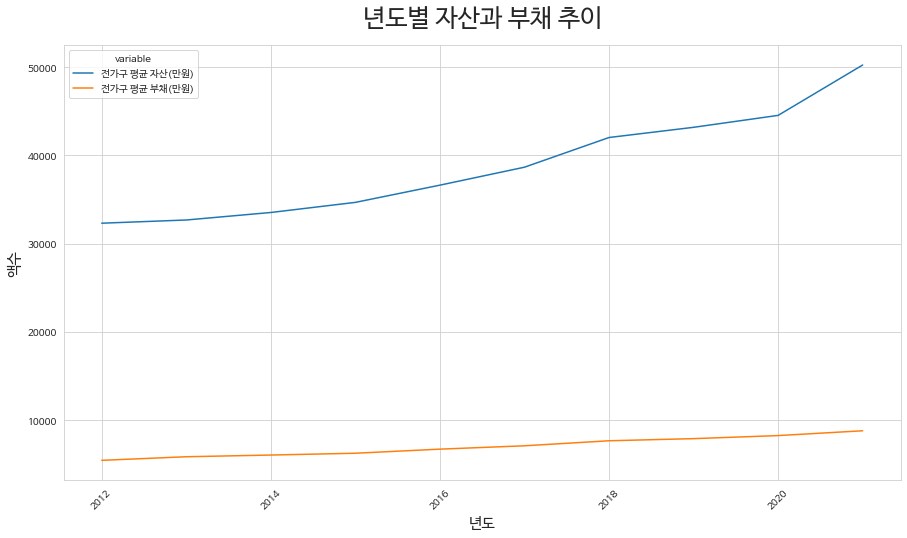

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

sns.lineplot(x="시점", y="value", hue="variable", data=asset_merge_melted)


plt.xlabel("년도", fontsize=15)
plt.ylabel("액수", fontsize=15)

plt.title("년도별 자산과 부채 추이", fontsize=25, pad=20)

plt.show()

### 세분화해서 부채 증가율만 보기

In [ ]:
asset_merge.head()

,시점,전가구 평균 자산(만원),전가구 평균 부채(만원)
0,2012,32324,5450
1,2013,32688,5858
2,2014,33539,6051
3,2015,34685,6256
4,2016,36637,6719


In [ ]:
new_year =[]
for i in range(1, 10):
  new_year.append(asset_merge["시점"].values[i])

new_year

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
asset_increase=[]
for i in range(1, 10):
  asset_increase.append((asset_merge["전가구 평균 부채(만원)"].values[i]-asset_merge["전가구 평균 부채(만원)"].values[i-1])/asset_merge["전가구 평균 부채(만원)"].values[i-1]*100)

In [ ]:
asset_increase

[7.486238532110091,
 3.2946398088084674,
 3.387869773591142,
 7.400895140664962,
 5.655603512427445,
 8.015213410339484,
 3.1559728742827335,
 4.374209860935525,
 6.601259689922482]

In [ ]:
new_data_debt = pd.DataFrame(new_year, asset_increase)
new_data_debt = new_data_debt.reset_index()
new_data_debt.columns =["전년 대비 부채 증가율", "년도"]
new_data_debt

,전년 대비 부채 증가율,년도
0,7.486239,2013
1,3.294640,2014
2,3.387870,2015
3,7.400895,2016
4,5.655604,2017
5,8.015213,2018
6,3.155973,2019
7,4.374210,2020
8,6.601260,2021


In [ ]:
new_data_debt["전년 대비 부채 증가율"].mean()

5.485766955898035

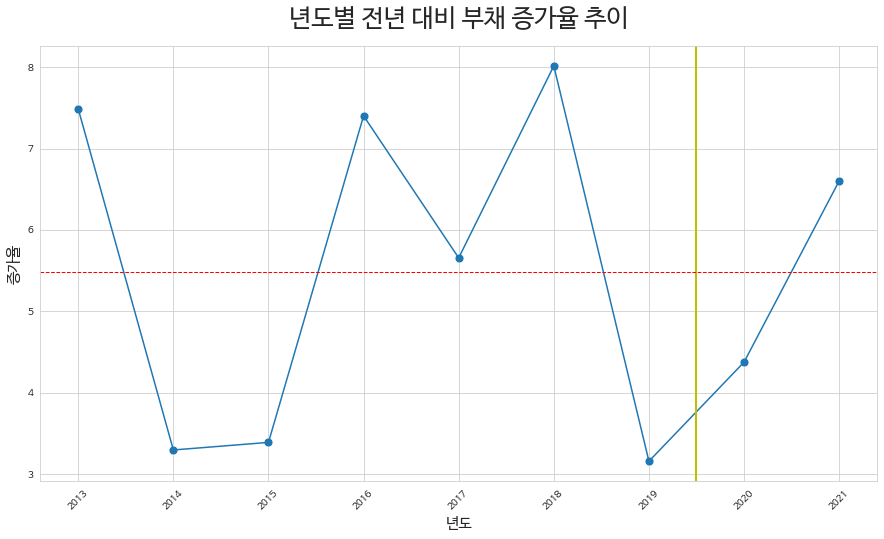

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

sns.scatterplot(x="년도", y="전년 대비 부채 증가율", s=80, data=new_data_debt)
sns.lineplot(x="년도", y="전년 대비 부채 증가율", data=new_data_debt)
plt.axvline(x=2019.5, color='y', linestyle='solid', linewidth=2)
plt.axhline(new_data_debt["전년 대비 부채 증가율"].mean(), 0, 8, color='red', linestyle='--', linewidth=1)


plt.xlabel("년도", fontsize=15)
plt.ylabel("증가율", fontsize=15)

plt.title("년도별 전년 대비 부채 증가율 추이", fontsize=25, pad=20)

plt.show()

### 거리 두기 실행 여부에 따른 부채 증가 이유는?

In [ ]:
house_data = pd.read_csv("house_data_fin.csv")

In [ ]:
house_data = house_data.loc[house_data["year"] >=2019, :].reset_index(drop=True)
house_data.head()

,year,financial_asset,debt,debt_reason
0,2019,7000.0,0.0,0.0
1,2020,5000.0,5000.0,11.0
2,2019,350.0,0.0,0.0
3,2020,500.0,0.0,0.0
4,2019,2700.0,0.0,0.0


In [ ]:
house_data = house_data.replace(0, np.NaN)

In [ ]:
house_data.loc[house_data["year"] ==2019, "year"] = "거리두기 off"
house_data.loc[house_data["year"] ==2020, "year"] = "거리두기 on"
house_data.head()

,year,financial_asset,debt,debt_reason
0,거리두기 off,7000.0,NaN,NaN
1,거리두기 on,5000.0,5000.0,11.0
2,거리두기 off,350.0,NaN,NaN
3,거리두기 on,500.0,NaN,NaN
4,거리두기 off,2700.0,NaN,NaN


In [ ]:
cols = ["year", "debt_reason"]
house_data_reason = house_data[cols]
house_data_reason.head()

,year,debt_reason
0,거리두기 off,NaN
1,거리두기 on,11.0
2,거리두기 off,NaN
3,거리두기 on,NaN
4,거리두기 off,NaN


In [ ]:
house_data_reason = house_data_reason.dropna(axis=0).reset_index(drop=True)
house_data_reason.head()

,year,debt_reason
0,거리두기 on,11.0
1,거리두기 off,8.0
2,거리두기 off,11.0
3,거리두기 on,11.0
4,거리두기 on,2.0


In [ ]:
house_data_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8694 non-null   object 
 1   debt_reason  8694 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.0+ KB


In [ ]:
house_data_reason.loc[house_data_reason["debt_reason"]==0, "debt_reason"] = "자녀 교육비"
house_data_reason.loc[house_data_reason["debt_reason"]==1, "debt_reason"] = "자녀 외의 가구원 교육비"
house_data_reason.loc[house_data_reason["debt_reason"]==2, "debt_reason"] = "주택 마련"
house_data_reason.loc[house_data_reason["debt_reason"]==3, "debt_reason"] = "전세금 마련"
house_data_reason.loc[house_data_reason["debt_reason"]==4, "debt_reason"] = "자동차, 가구, 가전제품 등 내구재 구입비"
house_data_reason.loc[house_data_reason["debt_reason"]==5, "debt_reason"] = "생활비"
house_data_reason.loc[house_data_reason["debt_reason"]==6, "debt_reason"] = "결혼, 상제비"
house_data_reason.loc[house_data_reason["debt_reason"]==7, "debt_reason"] = "질병, 재난"
house_data_reason.loc[house_data_reason["debt_reason"]==8, "debt_reason"] = "창업 또는 사업 자금"
house_data_reason.loc[house_data_reason["debt_reason"]==9, "debt_reason"] = "제테크(부동산/주식 투자)"
house_data_reason.loc[house_data_reason["debt_reason"]==10, "debt_reason"] = "보증"
house_data_reason.loc[house_data_reason["debt_reason"]==11, "debt_reason"] = "전세금/임대보증금 받은 것, 미리 탄 곗돈"
house_data_reason.loc[house_data_reason["debt_reason"]==12, "debt_reason"] = "가족이나 친지, 친구 도움"
house_data_reason.loc[house_data_reason["debt_reason"]==13, "debt_reason"] = "기타"
house_data_reason.loc[house_data_reason["debt_reason"]==-1, "debt_reason"] = "무응답"

In [ ]:
house_data_reason_melted = pd.melt(
    house_data_reason,
    id_vars=["year"],
    value_vars=["debt_reason"]
)

house_data_reason_melted.head()

,year,variable,value
0,거리두기 on,debt_reason,"전세금/임대보증금 받은 것, 미리 탄 곗돈"
1,거리두기 off,debt_reason,창업 또는 사업 자금
2,거리두기 off,debt_reason,"전세금/임대보증금 받은 것, 미리 탄 곗돈"
3,거리두기 on,debt_reason,"전세금/임대보증금 받은 것, 미리 탄 곗돈"
4,거리두기 on,debt_reason,주택 마련


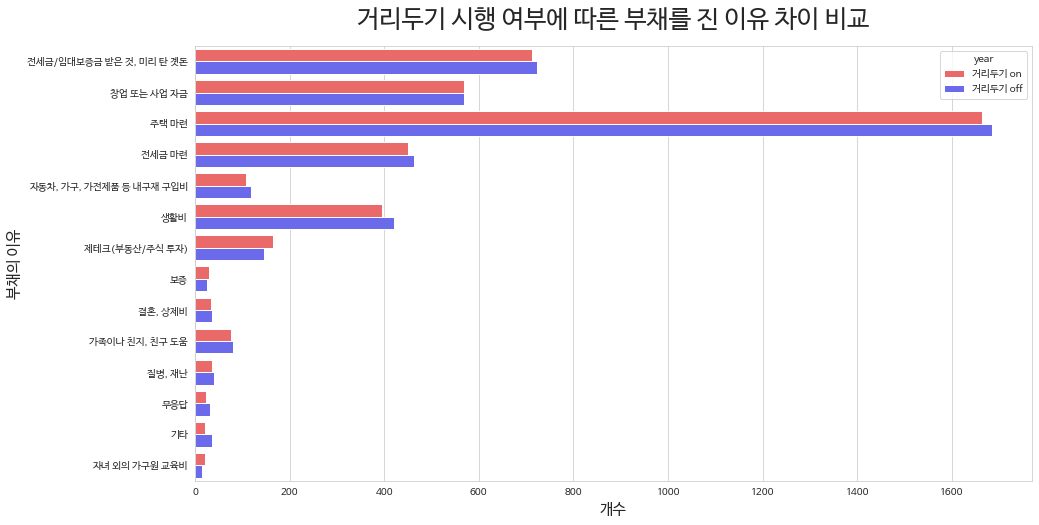

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))


sns.countplot(y="value", hue="year", data=house_data_reason_melted, palette='seismic_r')


plt.ylabel("부채의 이유", fontsize=15)
plt.xlabel("개수", fontsize=15)

plt.title("거리두기 시행 여부에 따른 부채를 진 이유 차이 비교", fontsize=25, pad=20)

plt.show()

#### 생활비 지원

In [ ]:
gov_sub = pd.read_csv("gov_sub.csv")
gov_sub.head()

,year,생활비 지원,고용 지원,양육 지원,의료 지원
0,2020,0.0,0.0,0.0,0.0
1,2020,82.0,0.0,0.0,0.0
2,2020,70.0,40.0,0.0,0.0
3,2020,0.0,0.0,0.0,0.0
4,2020,80.0,40.0,0.0,0.0


In [ ]:
gov_sub_group = gov_sub.groupby("year")[["생활비 지원", "고용 지원", "양육 지원", "의료 지원"]].sum().reset_index()
gov_sub_group

,year,생활비 지원,고용 지원,양육 지원,의료 지원
0,2020,972027.0,88573.0,55670.0,5298.0


In [ ]:
ratio = [(gov_sub_group[gov_sub_group.columns[i]][0]/(gov_sub_group["생활비 지원"][0]+gov_sub_group["고용 지원"][0]+gov_sub_group["양육 지원"][0]+gov_sub_group["의료 지원"][0]))*100 for i in range(1, 5)]

In [ ]:
ratio

[86.66679149191133, 7.897247425033524, 4.963586692915632, 0.47237439013951893]

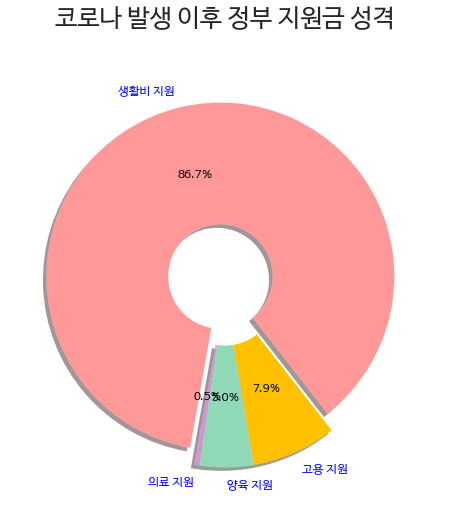

In [ ]:
plt.figure(figsize=(15, 8))
plt.rc('font', family='NanumBarunGothic')
labels = ['생활비 지원', '고용 지원', '양육 지원', '의료 지원']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = (0.1, 0, 0, 0)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': .1}

patches, texts, autotexts = plt.pie(
    ratio,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    startangle=260,
    counterclock=False,
    shadow=True,
    colors=colors,
    wedgeprops=wedgeprops
)

for t in texts:
  t.set_fontsize(12)
  t.set_color('blue')

for t in autotexts:
  t.set_fontsize(12)
  t.set_color('black')

plt.title("코로나 발생 이후 정부 지원금 성격", fontsize=25, pad=50)
plt.show()

In [ ]:
gov_sub_group

,year,생활비 지원,고용 지원,양육 지원,의료 지원
0,2020,972027.0,88573.0,55670.0,5298.0


In [ ]:
gov_sub_group = gov_sub_group.T
gov_sub_group

,0
year,2020.0
생활비 지원,972027.0
고용 지원,88573.0
양육 지원,55670.0
의료 지원,5298.0


In [ ]:
gov_sub_group = gov_sub_group.reset_index()
gov_sub_group

,index,0
0,year,2020.0
1,생활비 지원,972027.0
2,고용 지원,88573.0
3,양육 지원,55670.0
4,의료 지원,5298.0


In [ ]:
gov_sub_group = gov_sub_group.drop(0, axis=0).reset_index(drop=True)
gov_sub_group.columns = ["지원금 성격", "총 지원 액수"]
gov_sub_group

,지원금 성격,총 지원 액수
0,생활비 지원,972027.0
1,고용 지원,88573.0
2,양육 지원,55670.0
3,의료 지원,5298.0


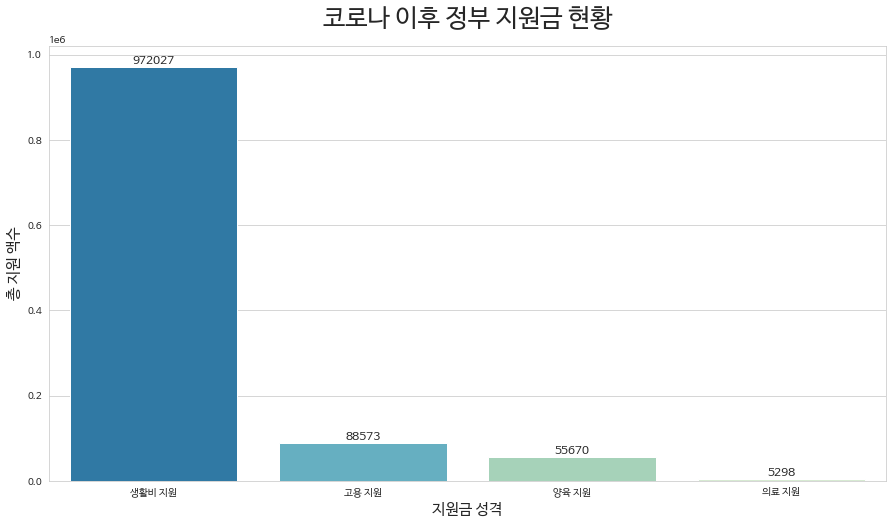

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))

sns.barplot(x='지원금 성격', y='총 지원 액수', data=gov_sub_group, palette='GnBu_r')

for i in range(4):
    height = gov_sub_group["총 지원 액수"][i]
    plt.text(i, height + 0.25, '%.f' %height, ha='center', va='bottom', size = 12)

plt.xlabel("지원금 성격", fontsize=15)
plt.ylabel("총 지원 액수", fontsize=15)

plt.title("코로나 이후 정부 지원금 현황", fontsize=25, pad=20)

plt.show()

## 1-3 사람들은 위축되지 않고 정상적으로 소비 생활을 하고 있는가?

In [ ]:
credit_data = pd.read_csv("credit_card_data_fin.csv")
credit_data.head()

,year_month,total_cnt,total_installment_cnt,total_loan_cnt,total_amount,total_installment_amount,total_loan_amount
0,2019-01,1074268,34290,6948,52017579,10927588,5074184
1,2019-02,965929,29481,6278,45447319,8677504,4748129
2,2019-03,1090364,33219,7119,51657678,10143926,5208952
3,2019-04,1121038,33280,6890,50703371,9958998,4944347
4,2019-05,1186087,35026,7010,53404860,10361982,5068097


In [ ]:
cols_amount=["year_month", "total_amount", "total_installment_amount", "total_loan_amount"]
credit_data_amount = credit_data[cols_amount]
credit_data_amount.columns = ["year_month", "개인 신용카드 이용 금액 합계", "개인 할부 구매 이용 금액 합계", "개인 현금서비스 이용 금액 합계"]
credit_data_amount.head()

,year_month,개인 신용카드 이용 금액 합계,개인 할부 구매 이용 금액 합계,개인 현금서비스 이용 금액 합계
0,2019-01,52017579,10927588,5074184
1,2019-02,45447319,8677504,4748129
2,2019-03,51657678,10143926,5208952
3,2019-04,50703371,9958998,4944347
4,2019-05,53404860,10361982,5068097


In [ ]:
credit_data_amount_melted = pd.melt(
    credit_data_amount,
    id_vars=["year_month"],
    value_vars = ["개인 신용카드 이용 금액 합계", "개인 할부 구매 이용 금액 합계", "개인 현금서비스 이용 금액 합계"]
)

credit_data_amount_melted.head()

,year_month,variable,value
0,2019-01,개인 신용카드 이용 금액 합계,52017579
1,2019-02,개인 신용카드 이용 금액 합계,45447319
2,2019-03,개인 신용카드 이용 금액 합계,51657678
3,2019-04,개인 신용카드 이용 금액 합계,50703371
4,2019-05,개인 신용카드 이용 금액 합계,53404860


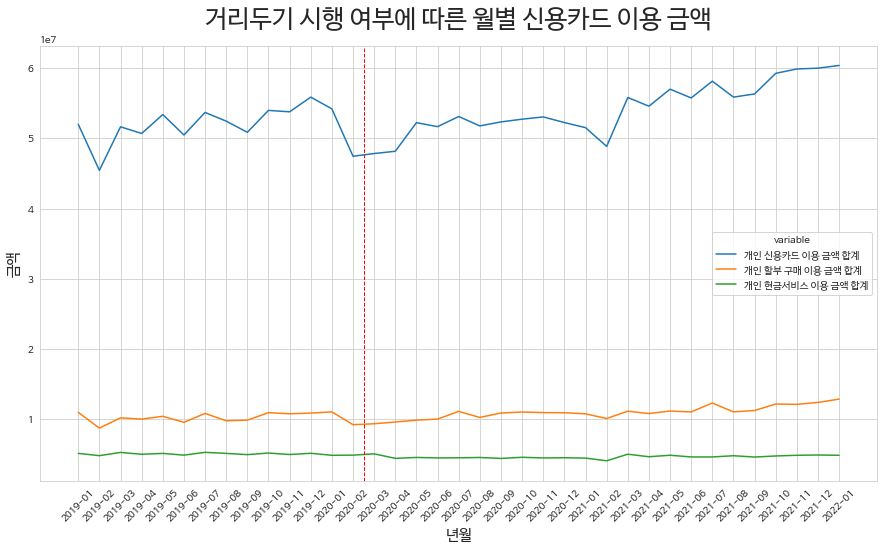

In [ ]:
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

sns.lineplot(x="year_month", y="value", hue="variable", data=credit_data_amount_melted)

plt.axvline(x=13.5, color='r', linestyle='--', linewidth=1)


plt.xlabel("년월", fontsize=15)
plt.ylabel("금액", fontsize=15)

plt.title("거리두기 시행 여부에 따른 월별 신용카드 이용 금액", fontsize=25, pad=20)

plt.show()

### 신용카드 이용 금액과 경제 심리 지수, 뉴스 심리 지수 사이에는 상관관계가 있는지

In [ ]:
credit_data.head()

,year_month,total_cnt,total_installment_cnt,total_loan_cnt,total_amount,total_installment_amount,total_loan_amount
0,2019-01,1074268,34290,6948,52017579,10927588,5074184
1,2019-02,965929,29481,6278,45447319,8677504,4748129
2,2019-03,1090364,33219,7119,51657678,10143926,5208952
3,2019-04,1121038,33280,6890,50703371,9958998,4944347
4,2019-05,1186087,35026,7010,53404860,10361982,5068097


In [ ]:
nsi_data = pd.read_csv("nsi_data_fin.csv")
nsi_data.tail()

,year_month,nsi
35,2021-12,110.11
36,2022-01,104.60
37,2022-02,103.71
38,2022-03,102.71
39,2022-04,105.03


In [ ]:
nsi_data = nsi_data.drop([37, 38, 39], axis=0)

In [ ]:
esi_data = pd.read_csv("esi_data_fin.csv")
esi_data.tail()

,year_month,esi_cyclicalvalue
34,2021-11,106.4
35,2021-12,106.1
36,2022-01,105.6
37,2022-02,104.9
38,2022-03,104.2


In [ ]:
esi_data = esi_data.drop([37, 38], axis=0)

In [ ]:
cols = ["year_month", "total_cnt", "total_installment_cnt", "total_loan_cnt"]
credit_data_new = credit_data[cols]

In [ ]:
two_merge = pd.merge(credit_data_new, esi_data, on="year_month")
two_merge.head()

,year_month,total_cnt,total_installment_cnt,total_loan_cnt,esi_cyclicalvalue
0,2019-01,1074268,34290,6948,95.2
1,2019-02,965929,29481,6278,95.1
2,2019-03,1090364,33219,7119,95.0
3,2019-04,1121038,33280,6890,94.9
4,2019-05,1186087,35026,7010,94.8


In [ ]:
three_merge = pd.merge(two_merge, nsi_data, on="year_month")
three_merge.head()

,year_month,total_cnt,total_installment_cnt,total_loan_cnt,esi_cyclicalvalue,nsi
0,2019-01,1074268,34290,6948,95.2,95.74
1,2019-02,965929,29481,6278,95.1,96.32
2,2019-03,1090364,33219,7119,95.0,96.29
3,2019-04,1121038,33280,6890,94.9,99.16
4,2019-05,1186087,35026,7010,94.8,95.23


In [ ]:
three_merge.columns = ["년월", "개인 신용카드 이용 금액 합계", "개인 신용카드 할부 구매 이용 금액 합계", "개인 신용카드 현금서비스 이용 금액 합계", "경제 심리 지수", "뉴스 심리 지수"]
three_merge.head()

,년월,개인 신용카드 이용 금액 합계,개인 신용카드 할부 구매 이용 금액 합계,개인 신용카드 현금서비스 이용 금액 합계,경제 심리 지수,뉴스 심리 지수
0,2019-01,1074268,34290,6948,95.2,95.74
1,2019-02,965929,29481,6278,95.1,96.32
2,2019-03,1090364,33219,7119,95.0,96.29
3,2019-04,1121038,33280,6890,94.9,99.16
4,2019-05,1186087,35026,7010,94.8,95.23


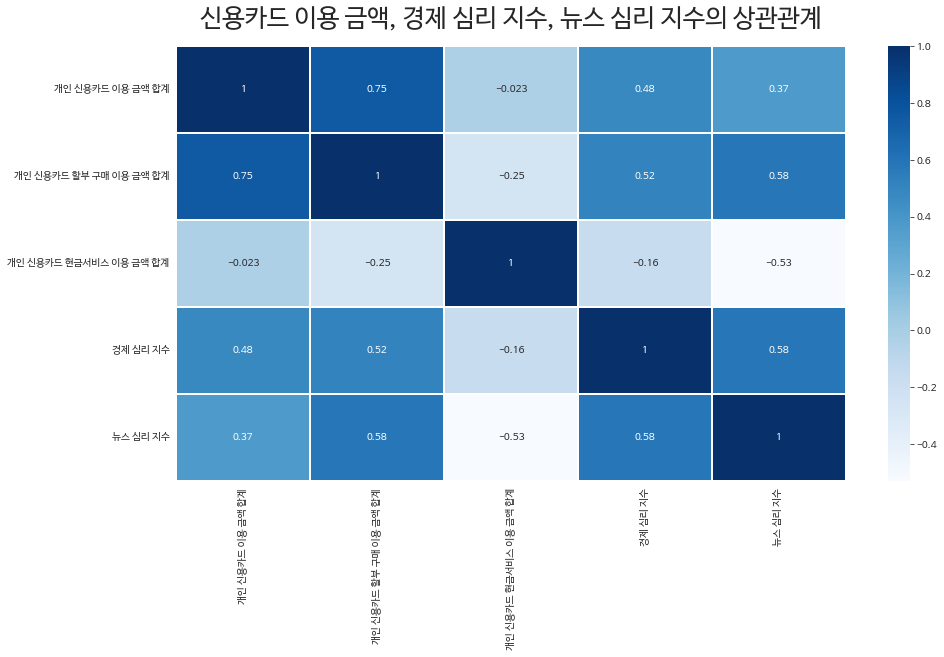

In [ ]:
plt.figure(figsize=(15, 8))
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

sns.heatmap(three_merge.corr(), annot=True, cmap="Blues", linewidths=1)

plt.title("신용카드 이용 금액, 경제 심리 지수, 뉴스 심리 지수의 상관관계", fontsize=25, pad=20)
plt.show()

# 2. 거리 두기 정책의 영향이 경제에 영향을 미쳤는지

In [ ]:
move_data = pd.read_csv("move_data.csv")
move_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   172 non-null    float64
 1   합계 이동량  172 non-null    float64
 2   관내 이동량  172 non-null    float64
 3   관외 이동량  172 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
move_data = move_data.astype({"index":"str"})

In [ ]:
move_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   172 non-null    object 
 1   합계 이동량  172 non-null    float64
 2   관내 이동량  172 non-null    float64
 3   관외 이동량  172 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
move_data["index"].values

array(['2019.01', '2019.01', '2019.01', '2019.01', '2019.01', '2019.02',
       '2019.02', '2019.02', '2019.02', '2019.03', '2019.03', '2019.03',
       '2019.03', '2019.04', '2019.04', '2019.04', '2019.04', '2019.05',
       '2019.05', '2019.05', '2019.05', '2019.05', '2019.06', '2019.06',
       '2019.06', '2019.06', '2019.07', '2019.07', '2019.07', '2019.07',
       '2019.08', '2019.08', '2019.08', '2019.08', '2019.08', '2019.09',
       '2019.09', '2019.09', '2019.09', '2019.1', '2019.1', '2019.1',
       '2019.1', '2019.1', '2019.11', '2019.11', '2019.11', '2019.11',
       '2019.12', '2019.12', '2019.12', '2019.12', '2020.01', '2020.01',
       '2020.01', '2020.01', '2020.01', '2020.02', '2020.02', '2020.02',
       '2020.02', '2020.03', '2020.03', '2020.03', '2020.03', '2020.04',
       '2020.04', '2020.04', '2020.04', '2020.04', '2020.05', '2020.05',
       '2020.05', '2020.05', '2020.06', '2020.06', '2020.06', '2020.06',
       '2020.07', '2020.07', '2020.07', '2020.07', '2020

In [ ]:
move_data["index"].values[0]

'2019.01'

In [ ]:
len(move_data["index"].values)

172

In [ ]:
movie_new_index =[]
for i in range(len(move_data["index"].values)):
  movie_new_index.append(move_data["index"].values[i].replace(".", "-"))

movie_new_index

['2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-02',
 '2019-02',
 '2019-02',
 '2019-02',
 '2019-03',
 '2019-03',
 '2019-03',
 '2019-03',
 '2019-04',
 '2019-04',
 '2019-04',
 '2019-04',
 '2019-05',
 '2019-05',
 '2019-05',
 '2019-05',
 '2019-05',
 '2019-06',
 '2019-06',
 '2019-06',
 '2019-06',
 '2019-07',
 '2019-07',
 '2019-07',
 '2019-07',
 '2019-08',
 '2019-08',
 '2019-08',
 '2019-08',
 '2019-08',
 '2019-09',
 '2019-09',
 '2019-09',
 '2019-09',
 '2019-1',
 '2019-1',
 '2019-1',
 '2019-1',
 '2019-1',
 '2019-11',
 '2019-11',
 '2019-11',
 '2019-11',
 '2019-12',
 '2019-12',
 '2019-12',
 '2019-12',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-01',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-02',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-03',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-04',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-05',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-06',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-07',
 '2020-08

In [ ]:
move_data["index"] = movie_new_index
move_data.head()

,index,합계 이동량,관내 이동량,관외 이동량
0,2019-01,107286640.0,73267421.0,34019219.0
1,2019-01,109856167.0,75223704.0,34632463.0
2,2019-01,110428194.0,75492823.0,34935371.0
3,2019-01,110926323.0,75842477.0,35083846.0
4,2019-01,110208286.0,74530848.0,35677438.0


In [ ]:
move_data_group = move_data.groupby("index")[["합계 이동량"]].sum().reset_index()

move_data_group.head()

,index,합계 이동량
0,2019-01,548705610.0
1,2019-02,429729149.0
2,2019-03,453005338.0
3,2019-04,460709859.0
4,2019-05,583466070.0


In [ ]:
move_data_group.columns = ["year_month", "월별 이동량 총합"]
move_data_group = move_data_group.drop(39, axis=0)
move_data_group.tail()

,year_month,월별 이동량 총합
34,2021-11,442972573.0
35,2021-12,532822384.0
36,2022-01,424382627.0
37,2022-02,411649848.0
38,2022-03,524124723.0


In [ ]:
move_esi_new = pd.merge(move_data_group, esi_data, on="year_month")
move_esi_new.head()

,year_month,월별 이동량 총합,esi_cyclicalvalue
0,2019-01,548705610.0,95.2
1,2019-02,429729149.0,95.1
2,2019-03,453005338.0,95.0
3,2019-04,460709859.0,94.9
4,2019-05,583466070.0,94.8


In [ ]:
move_esi_new.columns = ["year_month", "월별 이동량 총합", "경제 심리 지수"]

<Figure size 1080x576 with 0 Axes>

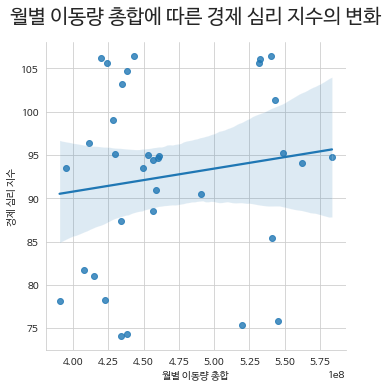

In [ ]:
plt.figure(figsize=(15, 8))

sns.lmplot(x='월별 이동량 총합', y='경제 심리 지수', data=move_esi_new)

plt.title("월별 이동량 총합에 따른 경제 심리 지수의 변화", fontsize=20, pad=20)
plt.show()

In [ ]:
Y = move_esi_new["경제 심리 지수"].values
Y = Y.reshape(-1,1)

In [ ]:
X3 = move_esi_new["월별 이동량 총합"].values
X3 = X3.reshape(-1,1)

In [ ]:
import statsmodels.api as sm 
results = sm.OLS(Y, sm.add_constant(X3)).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6469
Date:                Mon, 02 May 2022   Prob (F-statistic):              0.427
Time:                        02:17:14   Log-Likelihood:                -126.91
No. Observations:                  34   AIC:                             257.8
Df Residuals:                      32   BIC:                             260.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.1351     15.565      5.149      0.000      48.431     111.839
x1          2.659e-08   3.31e-08      0.804      0.427   -4.07e-08    9.39e-08
==============================================================================
Omnibus:                        2.625   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.768
Skew:                          -0.345   Prob(JB):                        0.413
Kurtosis:                       2.122   Cond. No.                     4.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""